# **Caso de uso: Predicción de precios de viviendas**

El mercado inmobiliario es un sector dinámico y altamente competitivo. Los precios de las viviendas pueden variar significativamente según sus características, la satisfacción de los clientes y el entorno en el que se encuentran. Contar con un modelo predictivo preciso y confiable es esencial para los compradores, vendedores y agentes inmobiliarios, ya que les brinda una estimación sólida del valor de una vivienda y les ayuda a tomar decisiones informadas.

El objetivo de este caso de uso es **desarrollar un modelo predictivo para estimar con precisión los precios de las viviendas**. Utilizando un conjunto de datos que incluye características de las viviendas, valoraciones que los algunos clientes han hecho en determinados portales y datos relacionados con las zonas en las que se encuentran, se busca proporcionar a los usuarios una herramienta confiable que les permita tomar decisiones informadas en el mercado inmobiliario.


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

## **1. Recopilación de datos**


In [149]:
# Funciones de carga e integración

from IPython.display import display


def load_houses(path: str) -> pd.DataFrame:
    """Load casas dataset from CSV."""
    df = pd.read_csv(path, sep=";")

    print("\nCASAS")
    print("Shape:", df.shape)
    display(df.head())
    print(df.dtypes)

    return df


def load_ratings(path: str) -> pd.DataFrame:
    """Load puntuaciones dataset from CSV."""
    df = pd.read_csv(path)

    print("\nPUNTUACIONES")
    print("Shape:", df.shape)
    display(df.head())
    print(df.dtypes)

    return df


def load_zones(path: str) -> pd.DataFrame:
    """Load zonas dataset from Excel."""
    df = pd.read_excel(path)

    print("\nZONAS")
    print("Shape:", df.shape)
    display(df.head())
    print(df.dtypes)

    return df

In [150]:
df_houses = load_houses("data/casas.csv")
df_ratings = load_ratings("data/puntuaciones.csv")
df_zones = load_zones("data/zonas.xlsx")


CASAS
Shape: (548, 14)


,id_vivienda,zona,superficie_m2,dormitorios,banos,acceso_carretera,cuarto_invitados,sotano,caldera,aire_acondicionado,parking,piscina,amueblado,precio
0,0,Windhelm,48.5,3.0,1.0,si,no,no,no,no,0,no,no,175000
1,1,Windhelm,39.1,3.0,1.0,no,no,no,no,no,0,no,si,175000
2,2,Windhelm,40.0,2.0,1.0,si,no,si,no,no,2,no,no,182000
3,3,Windhelm,39.9,2.0,1.0,no,no,no,no,no,1,no,no,185500
4,4,Windhelm,27.0,3.0,1.0,si,no,no,no,no,0,no,no,189000


id_vivienda             int64
zona                   object
superficie_m2         float64
dormitorios           float64
banos                 float64
acceso_carretera       object
cuarto_invitados       object
sotano                 object
caldera                object
aire_acondicionado     object
parking                object
piscina                object
amueblado              object
precio                  int64
dtype: object

PUNTUACIONES
Shape: (545, 4)


,Unnamed: 0,id_vivienda,puntuacion_miramicasa,puntuacion_casasbellas
0,0,0,5.071880,NaN
1,1,1,3.414731,2.713316
2,2,2,1.669790,2.457123
3,3,3,1.615732,2.064614
4,4,4,2.447773,NaN


Unnamed: 0                  int64
id_vivienda                 int64
puntuacion_miramicasa     float64
puntuacion_casasbellas    float64
dtype: object

ZONAS
Shape: (4, 3)


,ZONA,CRIMINALIDAD,ingresos_medios
0,Whiterun,2,42000
1,Windhelm,7,24000
2,Riften,9,39000
3,Dawnstar,3,26000


ZONA               object
CRIMINALIDAD        int64
ingresos_medios     int64
dtype: object


In [151]:
# Eliminar columna innecesaria de df_ratings
df_ratings = df_ratings.drop(columns=["Unnamed: 0"])

# Normalizar nombres de columnas en df_zones
df_zones = df_zones.rename(columns={"ZONA": "zona", "CRIMINALIDAD": "criminalidad"})

In [152]:
def merge_datasets(
    df_houses: pd.DataFrame,
    df_ratings: pd.DataFrame,
    df_zones: pd.DataFrame,
) -> pd.DataFrame:
    """Merge casas + puntuaciones + zonas."""
    # 1) Merge casas + puntuaciones por id_vivienda
    df = df_houses.merge(df_ratings, on="id_vivienda", how="left")

    # 2) Merge con zonas por "zona"
    df = df.merge(df_zones, on="zona", how="left")

    print("\nDATASET FINAL (MERGE)")
    print("Shape:", df.shape)
    display(df.head())

    return df

In [153]:
df = merge_datasets(df_houses, df_ratings, df_zones)


DATASET FINAL (MERGE)
Shape: (548, 18)


,id_vivienda,zona,superficie_m2,dormitorios,banos,acceso_carretera,cuarto_invitados,sotano,caldera,aire_acondicionado,parking,piscina,amueblado,precio,puntuacion_miramicasa,puntuacion_casasbellas,criminalidad,ingresos_medios
0,0,Windhelm,48.5,3.0,1.0,si,no,no,no,no,0,no,no,175000,5.071880,NaN,7,24000
1,1,Windhelm,39.1,3.0,1.0,no,no,no,no,no,0,no,si,175000,3.414731,2.713316,7,24000
2,2,Windhelm,40.0,2.0,1.0,si,no,si,no,no,2,no,no,182000,1.669790,2.457123,7,24000
3,3,Windhelm,39.9,2.0,1.0,no,no,no,no,no,1,no,no,185500,1.615732,2.064614,7,24000
4,4,Windhelm,27.0,3.0,1.0,si,no,no,no,no,0,no,no,189000,2.447773,NaN,7,24000


## **2. Limpieza y procesamiento de datos**


#### **2.1. Inspección inicial del dataset integrado**


In [154]:
df.shape

(548, 18)

In [155]:
df.head()

,id_vivienda,zona,superficie_m2,dormitorios,banos,acceso_carretera,cuarto_invitados,sotano,caldera,aire_acondicionado,parking,piscina,amueblado,precio,puntuacion_miramicasa,puntuacion_casasbellas,criminalidad,ingresos_medios
0,0,Windhelm,48.5,3.0,1.0,si,no,no,no,no,0,no,no,175000,5.071880,NaN,7,24000
1,1,Windhelm,39.1,3.0,1.0,no,no,no,no,no,0,no,si,175000,3.414731,2.713316,7,24000
2,2,Windhelm,40.0,2.0,1.0,si,no,si,no,no,2,no,no,182000,1.669790,2.457123,7,24000
3,3,Windhelm,39.9,2.0,1.0,no,no,no,no,no,1,no,no,185500,1.615732,2.064614,7,24000
4,4,Windhelm,27.0,3.0,1.0,si,no,no,no,no,0,no,no,189000,2.447773,NaN,7,24000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_vivienda             548 non-null    int64  
 1   zona                    548 non-null    object 
 2   superficie_m2           544 non-null    float64
 3   dormitorios             545 non-null    float64
 4   banos                   543 non-null    float64
 5   acceso_carretera        548 non-null    object 
 6   cuarto_invitados        548 non-null    object 
 7   sotano                  548 non-null    object 
 8   caldera                 548 non-null    object 
 9   aire_acondicionado      548 non-null    object 
 10  parking                 548 non-null    object 
 11  piscina                 546 non-null    object 
 12  amueblado               548 non-null    object 
 13  precio                  548 non-null    int64  
 14  puntuacion_miramicasa   548 non-null    fl

El conjunto de datos resultante contiene 548 observaciones y 18 variables. Se identifican variables numéricas (`int64`, `float64`) y variables categóricas (`object`), incluyendo varias variables binarias representadas como texto (por ejemplo, valores tipo `"si"` / `"no"`).

Se detectan algunos valores ausentes en variables numéricas relacionadas con características estructurales de la vivienda (como `superficie_m2`, `dormitorios` y `banos`) y en una variable de puntuación (`puntuacion_casasbellas`). Asimismo, se identifican valores ausentes en alguna variable categórica, como `piscina`.

Dado que el número de valores ausentes es reducido y no afecta a la variable objetivo (`precio`), se opta por una estrategia de imputación sencilla (mediana en variables numéricas y moda en variables categóricas) como parte del proceso de limpieza del dataset.

La codificación de variables categóricas y el escalado de variables numéricas se realizarán posteriormente, tras la separación en conjuntos de entrenamiento y test, ajustándose exclusivamente sobre el conjunto de entrenamiento con el objetivo de evitar posibles problemas de _data leakage_.


In [157]:
# Resumen de valores únicos en variables categóricas
cat_cols = df.select_dtypes(include="object").columns.tolist()

summary_cat = []

for col in cat_cols:
    vc = df[col].value_counts(dropna=False)
    n_unique = df[col].nunique(dropna=False)
    rare = (vc / vc.sum())[(vc / vc.sum()) < 0.02]  # <2%

    summary_cat.append(
        {
            "variable": col,
            "n_unique": n_unique,
            "top_values": ", ".join(
                [f"{idx} ({cnt})" for idx, cnt in vc.head(3).items()]
            ),
            "rare_values_<2%": (
                ", ".join([f"{idx} ({cnt})" for idx, cnt in rare.items()])
                if not rare.empty
                else "-"
            ),
        }
    )

summary_cat_df = pd.DataFrame(summary_cat).sort_values("n_unique", ascending=False)
summary_cat_df

,variable,n_unique,top_values,rare_values_<2%
6,parking,5,"0 (295), 1 (126), 2 (108)",? (0.012773722627737226)
0,zona,4,"Windhelm (160), Whiterun (143), Dawnstar (132)",-
7,piscina,3,"no (417), si (129), nan (2)",nan (0.0036496350364963502)
8,amueblado,3,"semi (228), no (179), si (141)",-
1,acceso_carretera,2,"si (470), no (78)",-
4,caldera,2,"no (523), si (25)",-
3,sotano,2,"no (356), si (192)",-
2,cuarto_invitados,2,"no (450), si (98)",-
5,aire_acondicionado,2,"no (375), si (173)",-


Como parte del control de calidad del dataset, se realiza una inspección sistemática de los valores únicos de todas las variables categóricas, analizando tanto su número de categorías como la frecuencia relativa de cada una de ellas. Este análisis permite detectar posibles codificaciones inconsistentes o categorías anómalas que no se identifican únicamente mediante la inspección de valores nulos.

Los resultados muestran que la mayoría de las variables categóricas presentan dominios reducidos y coherentes con su significado semántico, sin evidencias de inconsistencias relevantes. En el caso de la variable `parking`, se identifica una categoría adicional (`"?"`) con una frecuencia reducida (≈1.3 %), que no forma parte del dominio esperado de la variable y se interpreta como un valor erróneo de codificación.

Dado el carácter discreto de la variable y la baja proporción de valores ausentes, se opta por imputar dichos valores mediante la moda.


#### **2.2. Duplicados**


In [158]:
print("Duplicados (fila completa):", df.duplicated().sum())

Duplicados (fila completa): 3


In [159]:
dup = df[df["id_vivienda"].duplicated(keep=False)].sort_values("id_vivienda")
display(dup)

print(
    "Duplicados (fila completa) dentro de los duplicados por id:",
    dup.duplicated().sum(),
    "de",
    len(dup),
)

,id_vivienda,zona,superficie_m2,dormitorios,banos,acceso_carretera,cuarto_invitados,sotano,caldera,aire_acondicionado,parking,piscina,amueblado,precio,puntuacion_miramicasa,puntuacion_casasbellas,criminalidad,ingresos_medios
5,5,Windhelm,40.00,2.0,1.0,no,no,no,no,no,0,no,no,213500,3.291515,2.190532,7,24000
6,5,Windhelm,40.00,2.0,1.0,no,no,no,no,no,0,no,no,213500,3.291515,2.190532,7,24000
66,65,Windhelm,50.50,2.0,1.0,si,no,no,no,no,0,no,si,371000,5.422442,1.539515,7,24000
67,65,Windhelm,50.50,2.0,1.0,si,no,no,no,no,0,no,si,371000,5.422442,1.539515,7,24000
121,119,Windhelm,78.25,3.0,1.0,si,si,si,no,si,0,si,semi,542500,6.617011,4.157855,7,24000
122,119,Windhelm,78.25,3.0,1.0,si,si,si,no,si,0,si,semi,542500,6.617011,4.157855,7,24000


Duplicados (fila completa) dentro de los duplicados por id: 3 de 6


Se detectan 6 registros con `id_vivienda` duplicado. Al inspeccionarlos, se comprueba que corresponden a duplicados exactos (filas completas repetidas), es decir, no aportan información adicional.
Por coherencia del dataset (una fila = una vivienda), se elimina la duplicidad conservando una única observación por `id_vivienda`.


In [160]:
df = df.drop_duplicates(subset="id_vivienda").copy()
print("Shape tras eliminar duplicados:", df.shape)

Shape tras eliminar duplicados: (545, 18)


#### **2.3. Limpieza de variables**

Antes de preparar los datos para el modelado, se revisan las variables disponibles con el objetivo de identificar posibles columnas que no aporten información relevante para la predicción.

En este caso, se elimina la variable `id_vivienda`, ya que se trata únicamente de un identificador único de cada vivienda. Este tipo de variables no contiene información predictiva y su inclusión en el modelo podría introducir ruido innecesario.

El resto de variables se conservan para su posterior evaluación en las etapas de modelado.


In [161]:
df = df.drop(columns=["id_vivienda"])

#### **2.4. Limpieza de errores**

Para este conjunto de datos de viviendas, se establecen los siguientes criterios de validez para las principales variables numéricas:

- superficie_m2 > 0
- dormitorios > 0
- baños > 0
- precio > 0
- criminalidad ≥ 0
- ingresos_medios ≥ 0

Es decir:

- Las características físicas de la vivienda deben tomar valores estrictamente positivos.
- Los indicadores socioeconómicos asociados a la zona no pueden presentar valores negativos.


In [162]:
cols_to_check = [
    "superficie_m2",
    "dormitorios",
    "banos",
    "precio",
    "criminalidad",
    "ingresos_medios",
]

for col in cols_to_check:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")

superficie_m2: min = 26.5, max = 172.0
dormitorios: min = 1.0, max = 6.0
banos: min = 1.0, max = 4.0
precio: min = 175000, max = 1330000
criminalidad: min = 2, max = 9
ingresos_medios: min = 24000, max = 42000


Tras aplicar los criterios de validez definidos y revisar los rangos de las principales variables numéricas, se comprueba que todas ellas toman valores coherentes y acordes al contexto del problema.

En consecuencia, no se detectan registros que incumplan las condiciones establecidas, por lo que no es necesario realizar ninguna corrección adicional en esta fase de limpieza de errores.


#### **2.5. Outliers**

Se van a analizar únicamente las variables numéricas continuas más relevantes:

- `precio` (target)
- `superficie_m2`
- `ingresos_medios`

En cambio, en base a los rangos calculados en la limpieza de errores, NO se van a estudiar:

- `dormitorios` y `banos` (discretas y con rangos pequeños)
- `criminalidad` (escala acotada)


In [163]:
df_auto = df[["precio", "superficie_m2", "ingresos_medios"]].copy()

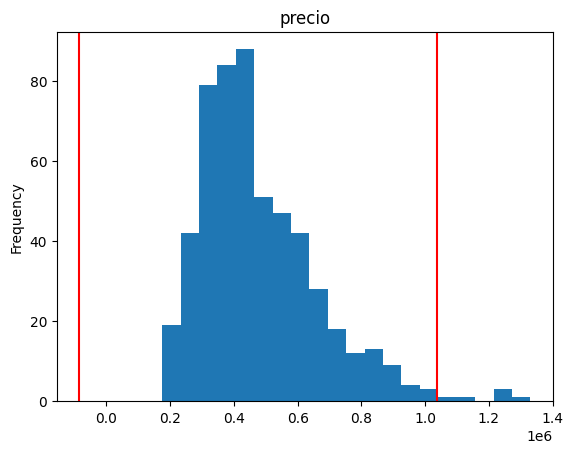

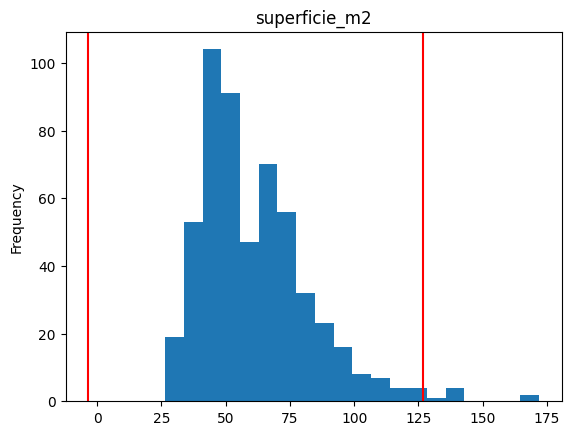

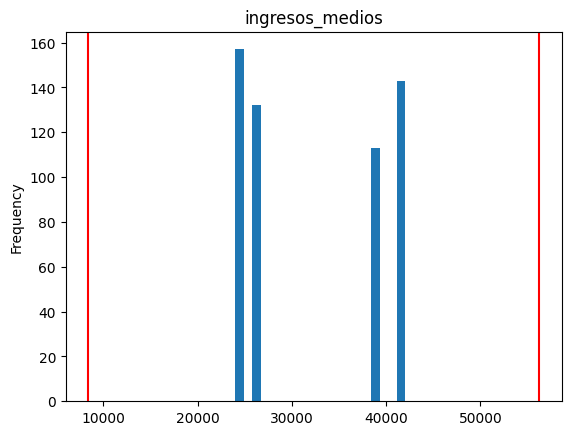

In [164]:
# Detección de outliers mediante histogramas y líneas de umbral
for col in df_auto.select_dtypes(include=["int", "float"]).columns:
    media = df_auto[col].mean()
    desviacion_estandar = df_auto[col].std()

    umbral_superior = media + 3 * desviacion_estandar
    umbral_inferior = media - 3 * desviacion_estandar

    df_auto[col].plot(kind="hist", bins=20)
    plt.axvline(umbral_inferior, color="red")
    plt.axvline(umbral_superior, color="red")
    plt.title(col)
    plt.show()
    plt.close()

Se analiza la presencia de valores atípicos en las principales variables numéricas continuas del conjunto de datos mediante inspección visual (histogramas) y siguiendo el criterio visto en clase basado en la media y la desviación estándar (±3σ).

En las variables `precio` y `superficie_m2` se observa una distribución asimétrica con una cola derecha pronunciada, lo que indica la presencia de algunos valores extremos.

Estos valores pueden corresponder a viviendas con características excepcionales, por lo que se opta por un tratamiento conservador mediante saturación de valores, limitando su influencia sin eliminar observaciones.

En el caso de `ingresos_medios`, al tratarse de una variable discreta asociada a un número reducido de zonas, no se consideran valores atípicos y no se aplica ningún tratamiento adicional.


In [165]:
df_auto = df_auto.drop(columns=["ingresos_medios"]).copy()

In [166]:
for col in df_auto.select_dtypes(include=["int", "float"]).columns:
    media = df_auto[col].mean()
    desviacion_estandar = df_auto[col].std()

    umbral_superior = media + 3 * desviacion_estandar
    umbral_inferior = media - 3 * desviacion_estandar

    # Saturar outliers
    df_auto[col] = np.where(
        (df_auto[col] > umbral_superior), umbral_superior, df_auto[col]
    )
    df_auto[col] = np.where(
        (df_auto[col] < umbral_inferior), umbral_inferior, df_auto[col]
    )

In [167]:
df[df_auto.columns] = df_auto

#### **2.6. Nulos**


In [168]:
# Corrección de valores erróneos en 'parking'
df["parking"] = df["parking"].replace("?", np.nan)

In [169]:
# Conteo de valores nulos por variable
nulls = df.isna().sum().sort_values(ascending=False)
print("Variables con valores nulos:")
print(nulls[nulls > 0])

Variables con valores nulos:
puntuacion_casasbellas    49
parking                    7
banos                      5
superficie_m2              4
dormitorios                3
piscina                    2
dtype: int64


Se identifican valores ausentes en un número reducido de variables del conjunto de datos. En particular, los valores nulos aparecen principalmente en variables numéricas asociadas a características de la vivienda (`parking`, `banos`, `superficie_m2`, `dormitorios`) y en una variable de puntuación (`puntuacion_casasbellas`), así como de forma residual en una variable binaria (`piscina`).

Dado que la proporción de valores ausentes es baja en relación con el tamaño del dataset y no afecta a la variable objetivo (`precio`), se opta por un enfoque conservador basado en la imputación de valores como parte del proceso de limpieza de datos.

- Las variables numéricas se imputan utilizando la mediana, por su robustez frente a valores extremos; a excepción de la variable `parking`, que al ser una variable numérica discreta, se imputa utilizando la moda.
- La variable binaria se imputa mediante la moda, manteniendo la coherencia con el resto de observaciones.


In [170]:
# Imputación específica de 'parking' (variable numérica discreta) y conversión a numérico
parking_moda = df["parking"].mode().iloc[0]
df["parking"] = df["parking"].fillna(parking_moda)
df["parking"] = pd.to_numeric(df["parking"])

In [171]:
# Identificar columnas por tipo
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(
    include=["object"]
).columns  # hay que volver a definirla por haber cambiado el tipo de 'parking'

print("Columnas numéricas:", num_cols.tolist())
print("Columnas categóricas:", cat_cols.tolist())

Columnas numéricas: ['superficie_m2', 'dormitorios', 'banos', 'parking', 'precio', 'puntuacion_miramicasa', 'puntuacion_casasbellas', 'criminalidad', 'ingresos_medios']
Columnas categóricas: ['zona', 'acceso_carretera', 'cuarto_invitados', 'sotano', 'caldera', 'aire_acondicionado', 'piscina', 'amueblado']


In [172]:
# Imputar variables numéricas (mediana)
for col in num_cols:
    if df[col].isna().sum() > 0:
        mediana = df[col].median()
        df[col] = df[col].fillna(mediana)

In [173]:
# Imputar variables categóricas (moda)
for col in cat_cols:
    if df[col].isna().sum() > 0:
        moda = df[col].mode().iloc[0]
        df[col] = df[col].fillna(moda)

In [174]:
print("Nulos totales tras imputación:", df.isna().sum().sum())

Nulos totales tras imputación: 0


## **3. Exploración y análisis de datos:**


#### **3.1. Análisis univariante de variables**


In [175]:
# Estadísticos descriptivos de todas las variables numéricas
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
superficie_m2,545.0,61.327491,20.639371,26.5,46.000000,56.000000,73.600000,1.267947e+02
dormitorios,545.0,2.966972,0.736902,1.0,2.000000,3.000000,3.000000,6.000000e+00
banos,545.0,1.286239,0.502470,1.0,1.000000,1.000000,2.000000,4.000000e+00
parking,545.0,0.693578,0.861586,0.0,0.000000,0.000000,1.000000,3.000000e+00
precio,545.0,474836.830930,180405.712786,175000.0,343000.000000,434000.000000,574000.000000,1.037805e+06
puntuacion_miramicasa,545.0,5.481301,1.667267,0.0,4.285309,5.500657,6.496339,1.000000e+01
puntuacion_casasbellas,545.0,3.778203,1.454514,0.0,2.788198,3.528487,4.574025,1.000000e+01
criminalidad,545.0,5.133945,2.792197,2.0,2.000000,3.000000,7.000000,9.000000e+00
ingresos_medios,545.0,32317.431193,7973.080214,24000.0,24000.000000,26000.000000,42000.000000,4.200000e+04


A partir del análisis univariante de las variables numéricas se observan diferencias claras en escala, variabilidad y granularidad entre ellas.

Variables como `superficie_m2` y `precio` presentan rangos amplios y desviaciones estándar elevadas, lo que indica una variabilidad significativa entre viviendas. En el caso de `precio`, la media es superior a la mediana, lo que sugiere una distribución asimétrica con cola hacia valores altos.

Por el contrario, variables como `dormitorios`, `banos` y `parking` toman valores discretos con una variabilidad limitada, concentrándose la mayoría de las observaciones en pocos valores.

Las variables `puntuacion_miramicasa` y `puntuacion_casasbellas` se encuentran acotadas en el rango 0–10 y presentan distribuciones similares. Dado que ambas corresponden a puntuaciones procedentes de sistemas de valoración de viviendas, se asume que miden un mismo concepto subyacente relacionado con la valoración percibida de la vivienda, aunque puedan diferir en su metodología de cálculo.

Por último, `ingresos_medios` muestra una granularidad reducida, con percentiles que coinciden en valores concretos, lo que indica que, pese a ser una variable numérica, actúa como un indicador agregado por zona.


In [176]:
# Frecuencias absolutas y relativas por variable categórica
for col in cat_cols:
    print(f"\nVariable: {col}")
    display(
        df[col]
        .value_counts(dropna=False)
        .to_frame("count")
        .assign(percentage=lambda x: 100 * x["count"] / x["count"].sum())
    )


Variable: zona


,count,percentage
zona,,
Windhelm,157,28.807339
Whiterun,143,26.238532
Dawnstar,132,24.220183
Riften,113,20.733945



Variable: acceso_carretera


,count,percentage
acceso_carretera,,
si,468,85.87156
no,77,14.12844



Variable: cuarto_invitados


,count,percentage
cuarto_invitados,,
no,448,82.201835
si,97,17.798165



Variable: sotano


,count,percentage
sotano,,
no,354,64.954128
si,191,35.045872



Variable: caldera


,count,percentage
caldera,,
no,520,95.412844
si,25,4.587156



Variable: aire_acondicionado


,count,percentage
aire_acondicionado,,
no,373,68.440367
si,172,31.559633



Variable: piscina


,count,percentage
piscina,,
no,417,76.513761
si,128,23.486239



Variable: amueblado


,count,percentage
amueblado,,
semi,227,41.651376
no,178,32.660550
si,140,25.688073


El análisis univariante de las variables categóricas muestra diferencias relevantes en cuanto a cardinalidad y equilibrio entre categorías.

La variable `zona` presenta una distribución relativamente equilibrada entre sus distintas categorías, lo que sugiere que puede aportar información diferenciadora sin problemas derivados de un fuerte desbalance.

Por el contrario, varias variables binarias como `acceso_carretera`, `cuarto_invitados`, `piscina` y, especialmente, `caldera`, muestran distribuciones claramente desbalanceadas, con una categoría dominante. En el caso de `caldera`, la categoría mayoritaria concentra más del 95 % de las observaciones, lo que indica una variabilidad muy limitada desde un punto de vista univariante.

La variable `sotano` presenta una distribución más equilibrada entre categorías, mientras que `aire_acondicionado` muestra una proporción relevante de viviendas tanto con como sin esta característica, lo que sugiere un mayor potencial informativo.

Por último, `amueblado` es una variable multicategórica con una distribución relativamente equilibrada entre sus categorías, lo que puede aportar información adicional sobre el estado de la vivienda.


#### **3.2. Análisis bivariante con la variable objetivo (`precio`)**


In [177]:
# Correlación de variables numéricas con la variable objetivo 'precio'
corr_precio = df[num_cols].corr()["precio"].sort_values(ascending=False)

corr_precio

precio                    1.000000
puntuacion_casasbellas    0.829954
superficie_m2             0.547109
banos                     0.515649
puntuacion_miramicasa     0.434135
parking                   0.378691
dormitorios               0.368742
ingresos_medios           0.318171
criminalidad             -0.204961
Name: precio, dtype: float64

Para analizar la relación entre las variables numéricas y la variable objetivo `precio`, se ha calculado el coeficiente de correlación de Pearson.

Los resultados muestran una jerarquía clara en la intensidad de las asociaciones. Destaca `puntuacion_casasbellas`, que presenta la correlación positiva más elevada con el precio, seguida por variables estructurales como `superficie_m2` y `banos`, cuya relación moderada es coherente con su papel en la valoración de la vivienda.

Otras variables como `parking`, `dormitorios` e `ingresos_medios` muestran correlaciones positivas más débiles, mientras que `criminalidad` presenta una relación negativa con el precio, indicando que mayores niveles de criminalidad se asocian con precios de vivienda más bajos.


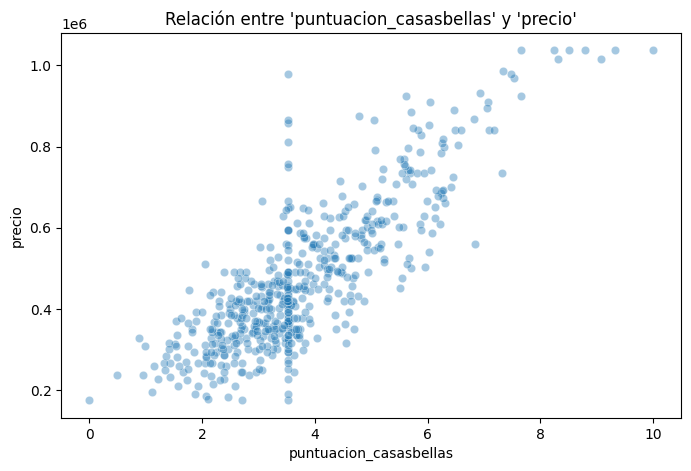

In [178]:
# Relación entre 'puntuacion_casasbellas' y 'precio'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="puntuacion_casasbellas", y="precio", alpha=0.4)
plt.title("Relación entre 'puntuacion_casasbellas' y 'precio'")
plt.xlabel("puntuacion_casasbellas")
plt.ylabel("precio")
plt.show()

El diagrama de dispersión muestra una relación positiva clara entre `puntuacion_casasbellas` y `precio`. La nube de puntos sigue un patrón aproximadamente lineal creciente, coherente con la elevada correlación observada previamente.

Se aprecia un aumento de la dispersión del precio para valores altos de la puntuación, lo que sugiere que, aunque esta variable captura una parte importante de la variabilidad del precio, intervienen otros factores adicionales en viviendas de mayor valoración.

En conjunto, el gráfico respalda la idoneidad de `puntuacion_casasbellas` como variable explicativa relevante y justifica su consideración en modelos de tipo lineal.


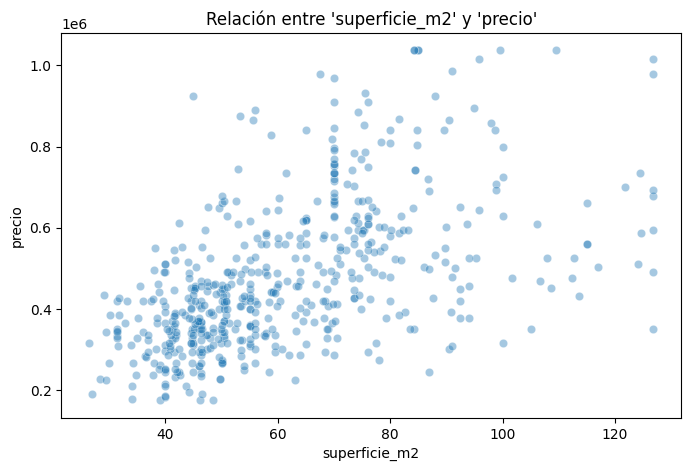

In [179]:
# Relación entre 'superficie_m2' y 'precio'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="superficie_m2", y="precio", alpha=0.4)
plt.title("Relación entre 'superficie_m2' y 'precio'")
plt.xlabel("superficie_m2")
plt.ylabel("precio")
plt.show()

El diagrama de dispersión entre `superficie_m2` y `precio` muestra una relación positiva clara: en general, viviendas de mayor tamaño presentan precios más elevados.

No obstante, la relación es más dispersa que la observada para variables de puntuación. Para valores similares de `superficie_m2` se observan rangos amplios de precios, especialmente en viviendas de mayor tamaño, lo que indica una elevada variabilidad no explicada únicamente por la superficie.

Además, se aprecia un aumento de la dispersión del precio conforme crece la superficie (heterocedasticidad), así como la presencia de outliers, lo que sugiere la influencia de otros factores adicionales como la ubicación, las características del inmueble o su valoración percibida.

En conjunto, este análisis confirma que `superficie_m2` es una variable relevante pero insuficiente por sí sola para explicar el precio de la vivienda, reforzando la necesidad de un enfoque multivariable.


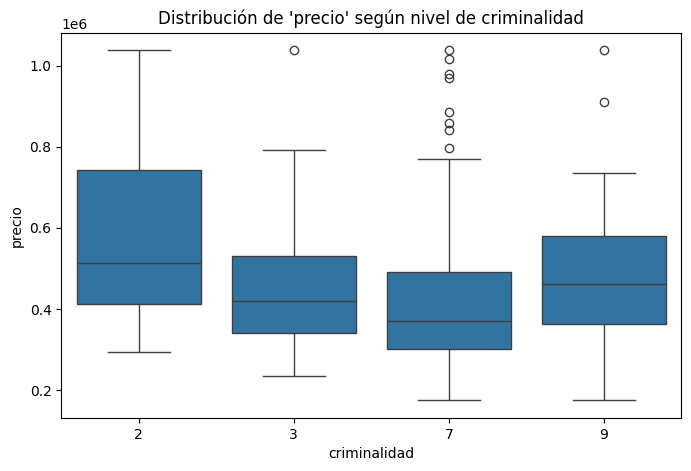

In [180]:
# Relación entre 'criminalidad' y 'precio'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="criminalidad", y="precio")
plt.title("Distribución de 'precio' según nivel de criminalidad")
plt.xlabel("criminalidad")
plt.ylabel("precio")
plt.show()

El diagrama de cajas muestra la distribución del `precio` para distintos niveles discretos de `criminalidad` (2, 3, 7 y 9), donde los valores 2 y 3 representan niveles bajos de criminalidad y los valores 7 y 9 niveles elevados.

A priori, cabría esperar una relación claramente negativa entre `criminalidad` y `precio`, de modo que zonas con menor criminalidad presentasen precios sistemáticamente más altos. Sin embargo, el gráfico no muestra un patrón monótono claro en este sentido.

Si bien los niveles bajos de criminalidad (especialmente `2`) presentan precios medianos elevados, el nivel más alto (`9`) también muestra una mediana de `precio` relativamente alta, comparable o incluso superior a la de niveles intermedios. Esto indica que zonas con alta criminalidad pueden seguir albergando viviendas de alto valor.

Además, se observa un solapamiento considerable entre las distribuciones de precios para los distintos niveles de `criminalidad`, así como la presencia de valores extremos en todos los grupos. Esto sugiere que el efecto de la criminalidad sobre el precio no es dominante y probablemente esté mediado por otras variables como la superficie, la calidad de la vivienda o la zona concreta.

En conjunto, aunque `criminalidad` presenta una correlación negativa moderada con `precio`, el análisis gráfico indica que su capacidad explicativa aislada es limitada, por lo que debe interpretarse como una variable contextual y no como un factor determinante del precio.


In [181]:
# Evaluación de variables categóricas según la variabilidad de la mediana del precio
cat_scores = {}

for col in cat_cols:
    medians = df.groupby(col)["precio"].median()
    cat_scores[col] = medians.max() - medians.min()

cat_scores = (
    pd.Series(cat_scores).sort_values(ascending=False).rename("rango_mediana_precio")
)

cat_scores

aire_acondicionado    187250.0
amueblado             164500.0
piscina               148750.0
zona                  143500.0
cuarto_invitados      133000.0
acceso_carretera      126000.0
caldera               105350.0
sotano                 82250.0
Name: rango_mediana_precio, dtype: float64

Para evaluar la relevancia de las variables categóricas en relación con la variable objetivo (`precio`), se ha analizado la variabilidad de la mediana del precio entre las distintas categorías de cada variable.

En concreto, para cada variable categórica se calcula la mediana del precio en cada una de sus categorías y se mide el rango de dichas medianas (diferencia entre la mediana máxima y la mínima). Este rango actúa como una medida de capacidad discriminativa de la variable respecto al precio: cuanto mayor es el rango, mayor es la diferencia de precios asociada a pertenecer a una u otra categoría.

El ranking resultante muestra que variables como `aire_acondicionado`, `amueblado` y `piscina` presentan los mayores rangos de mediana de precio, lo que indica que la presencia o ausencia de estas características se asocia con diferencias sustanciales en el valor de las viviendas. Esto sugiere que son variables categóricas con un alto potencial explicativo desde un punto de vista bivariante.

Variables como `zona`, `cuarto_invitados` y `acceso_carretera` muestran una capacidad discriminativa intermedia, aportando información relevante, aunque con un impacto más moderado sobre el precio.

Por el contrario, variables como `caldera` y `sotano` presentan rangos de mediana significativamente menores, lo que indica que, de forma aislada, su relación con el precio es más débil. Desde un análisis estrictamente bivariante, estas variables podrían considerarse candidatas a una menor prioridad en fases posteriores de modelado, sin descartar posibles interacciones con otras variables.


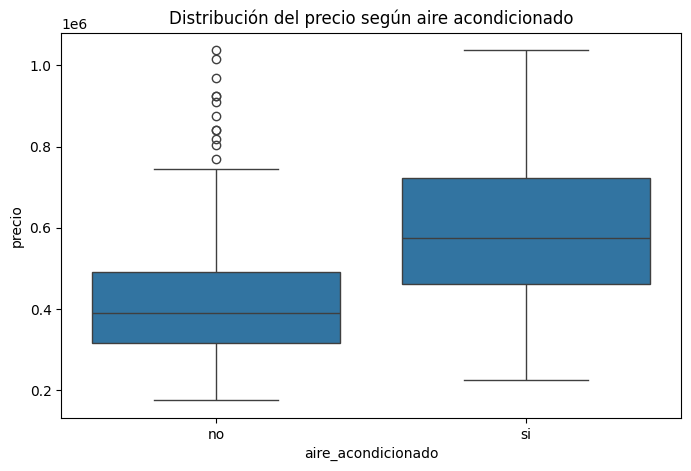

In [182]:
# Relación entre 'aire_acondicionado' y 'precio'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="aire_acondicionado", y="precio")
plt.title("Distribución del precio según aire acondicionado")
plt.xlabel("aire_acondicionado")
plt.ylabel("precio")
plt.show()

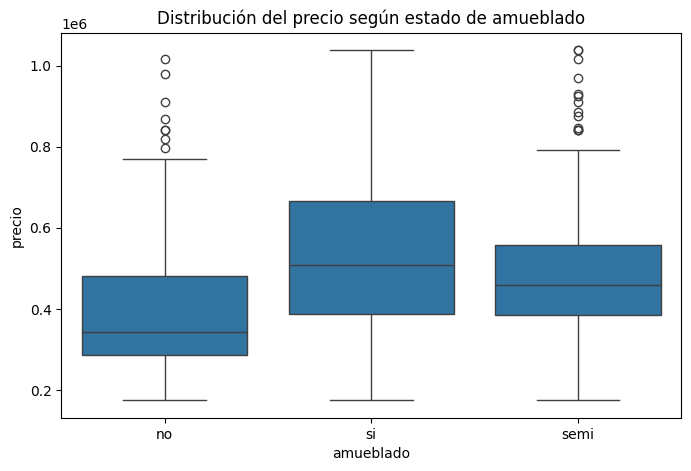

In [183]:
# Relación entre 'amueblado' y 'precio'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="amueblado", y="precio")
plt.title("Distribución del precio según estado de amueblado")
plt.xlabel("amueblado")
plt.ylabel("precio")
plt.show()

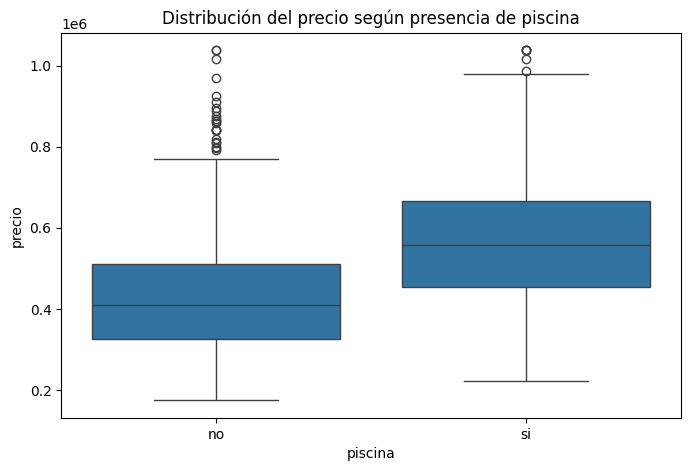

In [184]:
# Relación entre 'piscina' y 'precio'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="piscina", y="precio")
plt.title("Distribución del precio según presencia de piscina")
plt.xlabel("piscina")
plt.ylabel("precio")
plt.show()

El análisis de las variables categóricas con mayor variabilidad en la mediana del `precio` permite evaluar su capacidad discriminativa y su potencial utilidad de cara a la construcción del modelo predictivo.

Las viviendas con `aire_acondicionado` presentan una mediana de precio notablemente superior y una distribución desplazada hacia valores más altos, con un solapamiento limitado respecto a las viviendas sin esta característica. Este patrón indica un efecto consistente y estable sobre el precio, lo que refuerza su interés como variable explicativa.

En el caso de `amueblado`, se observan diferencias claras entre categorías. Las viviendas **sin amueblar** presentan, en general, precios más bajos, mientras que las **semi-amuebladas** y **amuebladas** muestran medianas de precio superiores. No obstante, la categoría `si` presenta una mayor dispersión y solapamiento con `semi`, lo que sugiere que el efecto del amueblado no es puramente binario y podría estar capturando distintos niveles de calidad o segmentación del mercado. Aun así, la variable aporta información relevante y diferenciadora.

Por último, la presencia de `piscina` también se asocia a precios significativamente más altos. Las viviendas con piscina muestran medianas superiores y una cola hacia valores elevados, coherente con el carácter diferencial y de alto valor añadido de esta característica. Aunque existe cierto solapamiento entre categorías, la diferencia central es clara y sistemática.

En conjunto, estas variables categóricas muestran una relación estructurada y coherente con el `precio`, aportando información complementaria a las variables numéricas. En particular, `aire_acondicionado` y `piscina` destacan por su capacidad discriminativa, mientras que `amueblado` introduce una complejidad adicional que puede resultar informativa para el modelo.


#### **3.3. Identificación de patrones y redundancias (eliminación de variables)**


In [185]:
# Resumen rápido: qué variables parecen más relacionadas con el precio

feature_cols = [c for c in df.columns if c != "precio"]
resumen = pd.DataFrame(index=feature_cols)

# tipo
resumen["tipo"] = "categórica"
resumen.loc[[c for c in feature_cols if c in num_cols], "tipo"] = "numérica"

# columnas para volcar métricas ya calculadas
resumen["metrica_tipo"] = ""
resumen["metrica"] = np.nan
resumen["fuerza_relacion"] = ""


# Numéricas -> correlación con precio (Pearson)
idx_num = corr_precio.index.intersection(resumen.index)

resumen.loc[idx_num, "metrica_tipo"] = "corr_pearson"
resumen.loc[idx_num, "metrica"] = corr_precio.loc[idx_num].values

# Fuerza de relación con 'precio' (heurística simple sobre |corr|)
abs_corr = corr_precio.loc[idx_num].abs()
resumen.loc[abs_corr.index[abs_corr < 0.30], "fuerza_relacion"] = "débil"
resumen.loc[
    abs_corr.index[(abs_corr >= 0.30) & (abs_corr < 0.60)], "fuerza_relacion"
] = "moderada"
resumen.loc[abs_corr.index[abs_corr >= 0.60], "fuerza_relacion"] = "fuerte"


# Categóricas -> rango de la mediana del precio
idx_cat = cat_scores.index.intersection(resumen.index)

resumen.loc[idx_cat, "metrica_tipo"] = "rango_mediana_precio"
resumen.loc[idx_cat, "metrica"] = cat_scores.loc[idx_cat].values

# Fuerza de relación con 'precio' (por terciles del rango: bajo/medio/alto)
q1 = cat_scores.loc[idx_cat].quantile(1 / 3)
q2 = cat_scores.loc[idx_cat].quantile(2 / 3)

resumen.loc[idx_cat[cat_scores.loc[idx_cat] <= q1], "fuerza_relacion"] = "débil"
resumen.loc[
    idx_cat[(cat_scores.loc[idx_cat] > q1) & (cat_scores.loc[idx_cat] <= q2)],
    "fuerza_relacion",
] = "moderada"
resumen.loc[idx_cat[cat_scores.loc[idx_cat] > q2], "fuerza_relacion"] = "fuerte"


# Orden: primero fuerte, luego moderada, luego débil; dentro, por magnitud de la métrica
orden = {"fuerte": 0, "moderada": 1, "débil": 2, "": 3}
resumen["_ord"] = resumen["fuerza_relacion"].map(orden).fillna(3)

# para ordenar numéricas por |corr| y categóricas por rango
resumen["_orden_metrica"] = resumen.apply(
    lambda r: (
        abs(r["metrica"]) if r["metrica_tipo"] == "corr_pearson" else r["metrica"]
    ),
    axis=1,
)

resumen = resumen.sort_values(
    by=["_ord", "_orden_metrica"], ascending=[True, False]
).drop(columns=["_ord", "_orden_metrica"])

resumen

,tipo,metrica_tipo,metrica,fuerza_relacion
aire_acondicionado,categórica,rango_mediana_precio,187250.000000,fuerte
amueblado,categórica,rango_mediana_precio,164500.000000,fuerte
piscina,categórica,rango_mediana_precio,148750.000000,fuerte
puntuacion_casasbellas,numérica,corr_pearson,0.829954,fuerte
zona,categórica,rango_mediana_precio,143500.000000,moderada
cuarto_invitados,categórica,rango_mediana_precio,133000.000000,moderada
superficie_m2,numérica,corr_pearson,0.547109,moderada
banos,numérica,corr_pearson,0.515649,moderada
puntuacion_miramicasa,numérica,corr_pearson,0.434135,moderada
parking,numérica,corr_pearson,0.378691,moderada


A partir de los análisis realizados (correlación de Pearson en variables numéricas y rango de la mediana del precio en variables categóricas), se integra la información en una tabla resumen para priorizar variables de cara al modelado.

En variables numéricas, `puntuacion_casasbellas` destaca como la relación más fuerte con `precio` (mayor correlación). A continuación aparecen variables estructurales como `superficie_m2` y `banos`, con una asociación moderada. `puntuacion_miramicasa` también muestra relación positiva, pero claramente menor que `puntuacion_casasbellas`, por lo que, aunque aporta señal, parece menos alineada con el precio.

Otras variables numéricas como `parking`, `dormitorios` e `ingresos_medios` presentan asociaciones moderadas, mientras que `criminalidad` aparece con correlación negativa y, además, en el análisis gráfico previo su comportamiento no es estrictamente monótono, lo que limita su utilidad como predictor directo.

En variables categóricas, el mayor rango de medianas del precio se observa en `aire_acondicionado`, `amueblado` y `piscina`, lo que sugiere que estas variables discriminan bien entre viviendas con diferentes niveles de `precio`. En cambio, `caldera` y `sotano` quedan en la parte baja del ranking, indicando menor capacidad discriminativa (en el caso de `caldera`, además, con fuerte desbalanceo de clases).

En base a estos patrones, se identifican variables candidatas a ser eliminadas del conjunto de datos, especialmente aquellas cuya relación con el precio resulta débil, redundante o inestable desde un análisis bivariante.


In [186]:
# Variables eliminadas tras el análisis bivariante
vars_to_drop = ["puntuacion_miramicasa", "criminalidad", "caldera", "sotano"]

df = df.drop(columns=vars_to_drop)

En particular, se decide:

- Eliminar `puntuacion_miramicasa`, por medir un concepto similar a `puntuacion_casasbellas` pero con una relación notablemente más débil con el precio.
- Eliminar `criminalidad`, debido a su correlación negativa y comportamiento no monótono observado en el análisis gráfico.
- Eliminar `caldera` y `sotano`, por su baja capacidad discriminativa y, en el caso de `caldera`, fuerte desbalanceo de clases.

Aunque `acceso_carretera` presenta una relación débil en el análisis bivariante, se mantiene en el conjunto de variables al no ser redundante ni presentar problemas de desbalanceo, permitiendo que el modelo evalúe su posible efecto combinado con otras variables.


#### **3.4. Conclusiones del EDA**


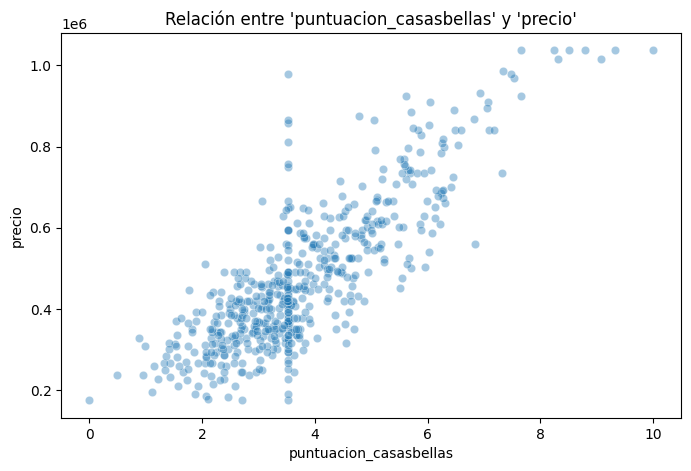

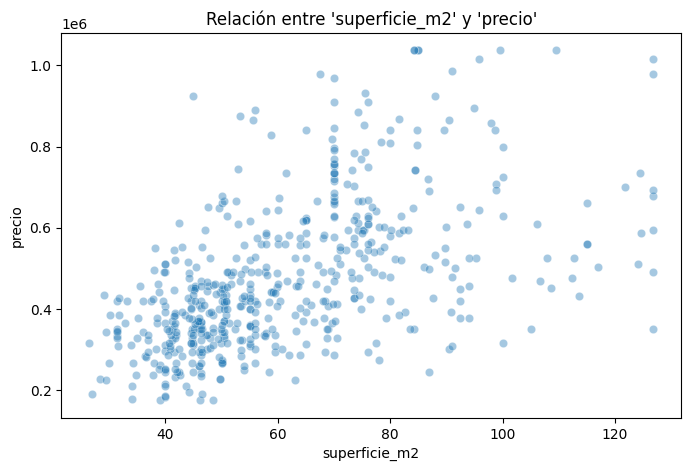

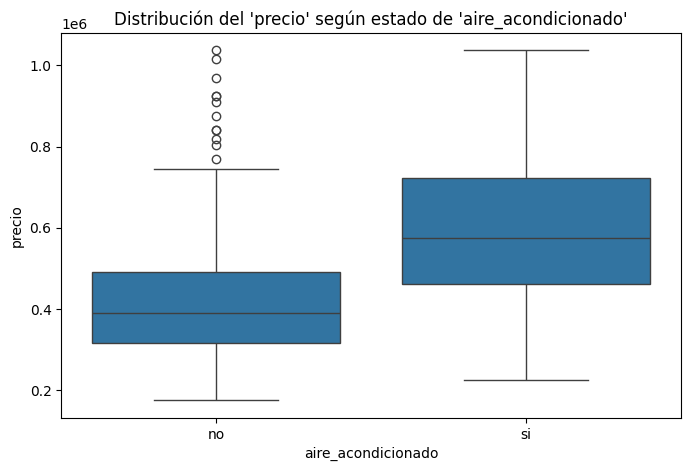

In [187]:
# Conclusiones finales: 3 gráficos clave del EDA

# 1) Mejor relación numérica: 'puntuacion_casasbellas' vs 'precio'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="puntuacion_casasbellas", y="precio", alpha=0.4)
plt.title("Relación entre 'puntuacion_casasbellas' y 'precio'")
plt.xlabel("puntuacion_casasbellas")
plt.ylabel("precio")
plt.show()

# 2) Variable estructural base: 'superficie_m2' vs 'precio'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="superficie_m2", y="precio", alpha=0.4)
plt.title("Relación entre 'superficie_m2' y 'precio'")
plt.xlabel("superficie_m2")
plt.ylabel("precio")
plt.show()

# 3) Categórica más informativa (3 niveles): 'aire_acondicionado' vs 'precio'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="aire_acondicionado", y="precio")
plt.title("Distribución del 'precio' según estado de 'aire_acondicionado'")
plt.xlabel("aire_acondicionado")
plt.ylabel("precio")
plt.show()

A modo de cierre del EDA, se seleccionan tres visualizaciones clave que resumen los patrones más relevantes de cara al modelado de `precio`.

En primer lugar, la relación entre `puntuacion_casasbellas` y `precio` destaca como la asociación más fuerte observada en el conjunto de datos. El gráfico muestra una relación positiva clara y aproximadamente lineal, con un incremento consistente del precio a medida que aumenta la puntuación. Esta variable emerge como el principal predictor individual del precio, capturando de forma efectiva la valoración percibida de la vivienda.

En segundo lugar, `superficie_m2` confirma su papel como variable estructural fundamental. Aunque presenta mayor dispersión que la puntuación, se observa una tendencia positiva clara entre tamaño y precio, coherente con la lógica del mercado inmobiliario. La variabilidad observada sugiere la influencia de otros factores complementarios, pero su contribución explicativa resulta incuestionable.

Por último, entre las variables categóricas, `aire_acondicionado` se identifica como la más informativa. El análisis muestra una separación clara entre las distribuciones de precio de las viviendas con y sin esta característica, con medianas significativamente superiores en aquellas que disponen de aire acondicionado. Esta variable introduce una diferenciación nítida y estable, aportando información relevante más allá de los factores puramente estructurales.

En conjunto, estos tres gráficos resumen los ejes principales que explican el precio de la vivienda en el dataset: percepción de calidad (`puntuacion_casasbellas`), dimensión física (`superficie_m2`) y equipamiento (`aire_acondicionado`). Estos resultados respaldan las decisiones de selección de variables adoptadas y proporcionan una base sólida para el desarrollo de modelos predictivos interpretables y eficientes.


## **4. Construcción del modelo predictivo**


#### **4.1. Definición de variable objetivo (_target_) y Split Train/Test**

En esta etapa se define de forma explícita la variable objetivo del problema y se separan los datos en conjuntos de entrenamiento y test.

La variable objetivo del modelo es `precio`, que representa el valor de la vivienda. El resto de variables se utilizarán como predictores.

La separación en conjuntos de entrenamiento y test se realiza **antes** de aplicar cualquier proceso de codificación o escalado. De este modo, se garantiza que la información del conjunto de test no influya en el ajuste de transformaciones posteriores, evitando así posibles problemas de _data leakage_.

Se reserva un porcentaje del conjunto de datos como conjunto de test, que se utilizará exclusivamente para la evaluación final de los modelos.


In [188]:
from sklearn.model_selection import train_test_split

# Definición de variables predictoras y variable objetivo
X = df.drop(columns=["precio"])
y = df["precio"]

# Separación Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (436, 12)
Shape X_test: (109, 12)
Shape y_train: (436,)
Shape y_test: (109,)


#### **4.2. Codificación y escalado de variables**

Para preparar los datos para el modelado, se aplican dos transformaciones habituales:

- **Codificación de variables categóricas** mediante _one-hot encoding_.
- **Escalado de variables numéricas** mediante estandarización.

Con el objetivo de evitar _data leakage_, ambas transformaciones se ajustan **únicamente** con el conjunto de entrenamiento:

- La codificación se construye a partir de las categorías presentes en `X_train`.
- El escalador se ajusta usando exclusivamente los valores de `X_train`.

Posteriormente, se aplican estas transformaciones tanto a `X_train` como a `X_test`, garantizando que el conjunto de test no influye en el ajuste del preprocesado.


In [189]:
# Separar columnas numéricas y categóricas (en base a X_train)
num_cols_train = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols_train = X_train.select_dtypes(include=["object"]).columns

print("Columnas numéricas:", num_cols_train.tolist())
print("Columnas categóricas:", cat_cols_train.tolist())

Columnas numéricas: ['superficie_m2', 'dormitorios', 'banos', 'parking', 'puntuacion_casasbellas', 'ingresos_medios']
Columnas categóricas: ['zona', 'acceso_carretera', 'cuarto_invitados', 'aire_acondicionado', 'piscina', 'amueblado']


In [190]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding (fit en train, transform en test)
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

X_train_cat = encoder.fit_transform(X_train[cat_cols_train])
X_test_cat = encoder.transform(X_test[cat_cols_train])

cat_feature_names = encoder.get_feature_names_out(cat_cols_train)

X_train_cat_df = pd.DataFrame(
    X_train_cat, columns=cat_feature_names, index=X_train.index
)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=cat_feature_names, index=X_test.index)

In [191]:
from sklearn.preprocessing import StandardScaler

# Scaling de variables numéricas (fit en train, transform en test)
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols_train])
X_test_num_scaled = scaler.transform(X_test[num_cols_train])

X_train_num_df = pd.DataFrame(
    X_train_num_scaled, columns=num_cols_train, index=X_train.index
)
X_test_num_df = pd.DataFrame(
    X_test_num_scaled, columns=num_cols_train, index=X_test.index
)

In [192]:
# Dataset final listo para modelado
X_train_ready = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_ready = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

print("Shapes finales:")
print("X_train_ready:", X_train_ready.shape)
print("X_test_ready:", X_test_ready.shape)

Shapes finales:
X_train_ready: (436, 15)
X_test_ready: (109, 15)


#### **4.3. Selección y entrenamiento de modelos predictivos**

Una vez preparados los datos para el modelado, se seleccionan dos algoritmos de aprendizaje automático diferentes para la predicción del `precio` de las viviendas, con el objetivo de comparar su comportamiento predictivo.

Se utiliza:

- Un **modelo lineal** como baseline interpretable.
- Un **modelo no lineal Random Forest**, capaz de capturar relaciones complejas entre las variables.

La evaluación comparativa de ambos modelos se realizará posteriormente sobre el conjunto de test.


In [193]:
# Modelo baseline: Regresión Lineal

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_ready, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [194]:
# Modelo no lineal: Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_ready, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

## **5. Evaluación y validación del modelo:**


Una vez entrenados los modelos predictivos, se evalúa su capacidad de generalización utilizando el conjunto de test, que no ha intervenido en ninguna fase previa del entrenamiento ni del preprocesado.

La evaluación se realiza mediante métricas habituales en problemas de regresión:

- **MAE (Mean Absolute Error)**: error medio absoluto.
- **RMSE (Root Mean Squared Error)**: penaliza errores grandes.
- **R² (coeficiente de determinación)**: proporción de varianza explicada.

Estas métricas permiten comparar de forma objetiva el rendimiento de los modelos entrenados.


In [195]:
# Predicciones sobre el conjunto de test
y_pred_lr = lr_model.predict(X_test_ready)
y_pred_rf = rf_model.predict(X_test_ready)

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Métricas Regresión Lineal
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

# Métricas Random Forest
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

# Tabla comparativa de resultados
results = pd.DataFrame(
    {
        "Modelo": ["Regresión Lineal", "Random Forest"],
        "MAE": [lr_mae, rf_mae],
        "RMSE": [lr_rmse, rf_rmse],
        "R2": [lr_r2, rf_r2],
    }
)

results

,Modelo,MAE,RMSE,R2
0,Regresión Lineal,66086.431759,85089.185625,0.808440
1,Random Forest,63586.019772,81821.833037,0.822869


Los resultados obtenidos muestran que el modelo **Random Forest** presenta un rendimiento predictivo ligeramente mejor que la **Regresión Lineal**, obteniendo menores errores (MAE y RMSE) y un mayor coeficiente de determinación (R²).

Esto sugiere que, aunque el problema presenta una componente lineal importante, existen relaciones no lineales entre las variables que son capturadas de forma más eficaz por el modelo Random Forest.

En términos absolutos, los valores de R² obtenidos (superiores a 0.8) indican un **buen rendimiento predictivo** para ambos modelos.


<Axes: title={'center': 'Importancia de variables - Regresión Lineal'}>

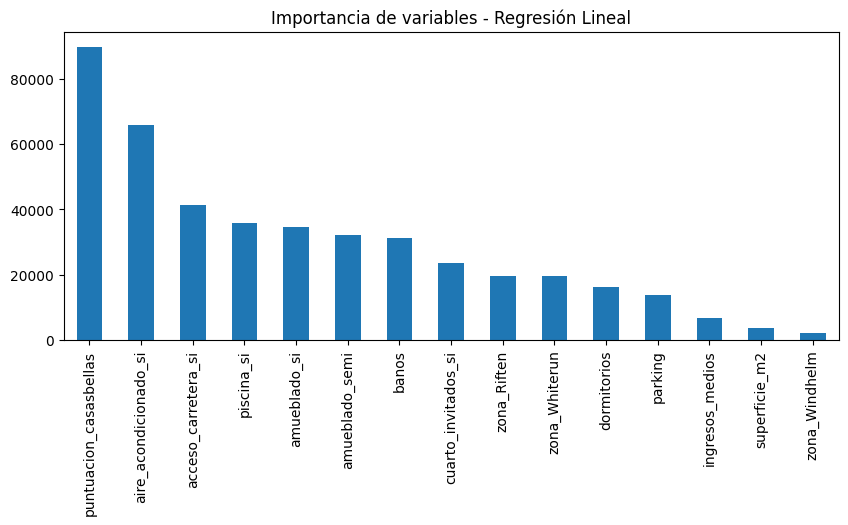

In [197]:
# Importancia de variables en Regresión Lineal
coefficients = (
    pd.Series(lr_model.coef_, index=X_train_ready.columns)
    .abs()
    .sort_values(ascending=False)
)

coefficients.plot(
    kind="bar", figsize=(10, 4), title="Importancia de variables - Regresión Lineal"
)

En la Regresión Lineal, las variables con mayor peso (coeficientes en valor absoluto) son `puntuacion_casasbellas` y `aire_acondicionado_si`, que aparecen como las dos características más influyentes y con magnitudes relativamente próximas. A continuación se observa un segundo bloque de variables con aportación relevante, principalmente relacionadas con prestaciones y características del inmueble, como `acceso_carretera_si`, `piscina_si`, `amueblado_si` / `amueblado_semi` y `banos`.

En la parte baja del ranking aparecen variables con una contribución mucho menor. En particular, `zona_Windhelm` muestra un impacto prácticamente residual, y variables como `superficie_m2` e `ingresos_medios` presentan un peso muy reducido en comparación con el resto. En el caso de `superficie_m2`, este resultado puede explicarse porque su información esté parcialmente recogida por otras variables correlacionadas (por ejemplo, `banos` o `dormitorios`), reduciendo su aportación marginal dentro del modelo lineal.

Por tanto, si el objetivo es simplificar la Regresión Lineal manteniendo un rendimiento similar, `zona_Windhelm` es una candidata clara a eliminación, y `superficie_m2` e `ingresos_medios` podrían considerarse también para una iteración de simplificación, verificando el impacto final mediante reevaluación en el conjunto de test.


<Axes: title={'center': 'Importancia de variables - Random Forest'}>

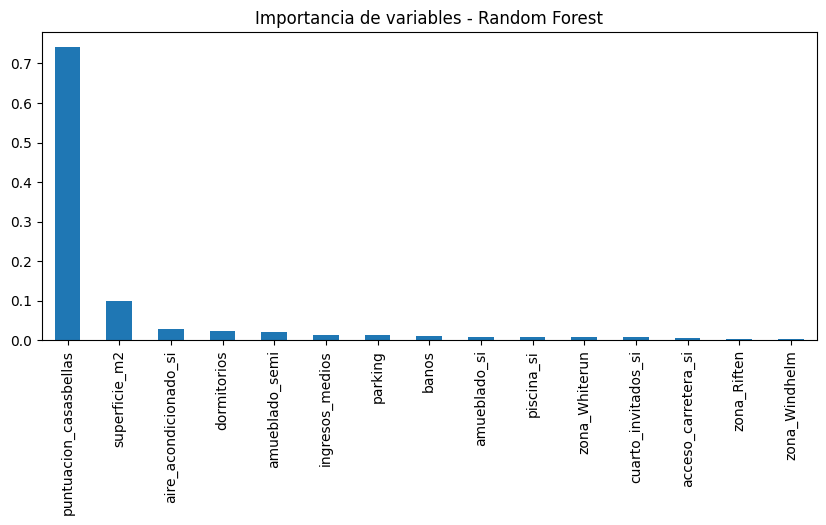

In [198]:
# Importancia de variables en Random Forest
feature_importances = pd.Series(
    rf_model.feature_importances_, index=X_train_ready.columns
).sort_values(ascending=False)

feature_importances.plot(
    kind="bar", figsize=(10, 4), title="Importancia de variables - Random Forest"
)

El análisis de la importancia de las variables en el modelo Random Forest muestra un patrón claramente distinto al observado en la Regresión Lineal. La variable `puntuacion_casasbellas` domina de forma muy marcada, concentrando la mayor parte de la capacidad explicativa del modelo. Esto indica que el modelo utiliza de manera recurrente esta variable para realizar particiones, aprovechando su alto contenido informativo y su capacidad para capturar relaciones no lineales con el `precio`.

A una distancia considerable aparece `superficie_m2`, que recupera relevancia en este enfoque al poder ser utilizada mediante umbrales y combinaciones no lineales con otras variables. A continuación se identifica un pequeño grupo de variables con aportación secundaria, como `aire_acondicionado_si`, `dormitorios` y `amueblado_semi`, que contribuyen al modelo pero con un impacto claramente inferior.

A partir de este punto, la importancia del resto de variables cae de forma pronunciada, observándose una larga cola de características con contribución prácticamente residual, entre las que se incluyen varias categorías de zona (`zona_Riften`, `zona_Windhelm`, `zona_Whiterun`) y variables binarias de equipamiento o acceso (`acceso_carretera_si`, `cuarto_invitados_si`, `piscina_si`). En este contexto, estas variables **no aportan información relevante al Random Forest** y son **claras candidatas a eliminación**, ya que su retirada podría reducir ruido y complejidad sin comprometer el rendimiento, e incluso favorecer una mejor generalización del modelo.


## **6. Optimización del modelo**

En esta sección se optimiza uno de los modelos previamente evaluados con el objetivo de reducir el error de predicción y analizar su capacidad de generalización.

Para ello, se selecciona el modelo **Random Forest**, al haber mostrado un mejor rendimiento predictivo que la Regresión Lineal en la fase de evaluación, así como una mayor capacidad para capturar relaciones no lineales entre las variables explicativas y el precio de la vivienda.

La optimización del modelo se aborda desde dos frentes complementarios:

1. **Eliminación de variables con baja aportación informativa**, identificadas a partir del análisis de importancias del modelo.
2. **Ajuste de hiperparámetros** mediante validación cruzada, con el objetivo de encontrar una configuración que minimice el error de predicción sin introducir sobreentrenamiento.


In [199]:
# Eliminación de variables irrelevantes
vars_to_drop_rf = [
    "zona_Riften",
    "zona_Windhelm",
    "zona_Whiterun",
    "acceso_carretera_si",
    "cuarto_invitados_si",
    "piscina_si",
]

X_train_rf = X_train_ready.drop(columns=vars_to_drop_rf)
X_test_rf = X_test_ready.drop(columns=vars_to_drop_rf)

El ajuste de hiperparámetros se realiza utilizando **Grid Search con validación cruzada de 5 particiones (cv = 5)** sobre el conjunto de entrenamiento.

La validación cruzada permite estimar el error del modelo sobre diferentes subconjuntos de los datos, reduciendo la dependencia de una única partición train–test y proporcionando una estimación más robusta del rendimiento esperado del modelo.

Durante este proceso se optimizan hiperparámetros clave del modelo Random Forest, como el número de árboles, la profundidad máxima de los árboles y el número mínimo de muestras requeridas en hojas y divisiones.


In [200]:
# Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 3, 5],
    "min_samples_split": [2, 5, 10],
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

grid.fit(X_train_rf, y_train)

grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

Una vez seleccionados los hiperparámetros óptimos, se reentrena el modelo Random Forest sobre el conjunto de entrenamiento reducido y se evalúa su rendimiento tanto en entrenamiento como en test.

Para analizar si el modelo presenta sobreentrenamiento, se comparan los errores obtenidos en:

- El conjunto de entrenamiento.
- La validación cruzada (media de los folds).
- El conjunto de test, utilizado únicamente como evaluación final.

Un modelo sobreentrenado presentaría un error muy bajo en entrenamiento y significativamente mayor en validación o test.


In [201]:
# Reentrenamiento y evaluación final
best_rf = grid.best_estimator_

# Métricas en TRAIN
y_pred_train = best_rf.predict(X_train_rf)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Métricas en TEST
y_pred_test = best_rf.predict(X_test_rf)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Métricas de validación cruzada
best_idx = grid.best_index_
mae_cv_train = -grid.cv_results_["mean_train_score"][best_idx]
mae_cv_val = -grid.cv_results_["mean_test_score"][best_idx]

print("Diagnóstico de sobreentrenamiento (Random Forest optimizado):")
print(f"MAE TRAIN (fit completo): {mae_train:.2f}")
print(f"MAE CV TRAIN (media):     {mae_cv_train:.2f}")
print(f"MAE CV VALID (media):     {mae_cv_val:.2f}")
print(f"MAE TEST (final):         {mae_test:.2f}")

print("\nGap de generalización:")
print(f"MAE TEST - MAE TRAIN:     {mae_test - mae_train:.2f}")
print(f"MAE CV VAL - CV TRAIN:    {mae_cv_val - mae_cv_train:.2f}")

Diagnóstico de sobreentrenamiento (Random Forest optimizado):
MAE TRAIN (fit completo): 37668.26
MAE CV TRAIN (media):     38269.35
MAE CV VALID (media):     60184.47
MAE TEST (final):         65159.47

Gap de generalización:
MAE TEST - MAE TRAIN:     27491.20
MAE CV VAL - CV TRAIN:    21915.13


Los resultados muestran un error significativamente menor en entrenamiento que en validación y test, lo que indica que el modelo es capaz de ajustarse muy bien a los datos de entrenamiento. Sin embargo, el error obtenido en validación cruzada y en test es coherente entre sí, lo que sugiere que el modelo generaliza de forma razonable.

Aunque existe un gap entre entrenamiento y test, este comportamiento es habitual en modelos complejos como Random Forest y no se observa un sobreentrenamiento extremo, ya que el rendimiento en test se mantiene estable y alineado con la validación cruzada.


In [202]:
# Comparativa final de modelos

# Métricas anteriores (apartado 5)
metrics_rf_base = {"MAE": 63586.019772, "RMSE": 81821.833037, "R2": 0.822869}

# Métricas del Random Forest optimizado (evaluación final en test)
metrics_rf_opt = {"MAE": mae_test, "RMSE": rmse_test, "R2": r2_test}

results_compare = pd.DataFrame(
    [
        {"Modelo": "Random Forest (base)", **metrics_rf_base},
        {"Modelo": "Random Forest (optimizado)", **metrics_rf_opt},
    ]
)

# Diferencias vs RF base (opt - base)
rf_base_row = results_compare.loc[
    results_compare["Modelo"] == "Random Forest (base)", ["MAE", "RMSE", "R2"]
].iloc[0]

rf_opt_row = results_compare.loc[
    results_compare["Modelo"] == "Random Forest (optimizado)", ["MAE", "RMSE", "R2"]
].iloc[0]

diff = (rf_opt_row - rf_base_row).to_frame(name="Δ (opt - base)")

print("Comparativa de métricas (base vs optimizado):")
display(results_compare)

print("Diferencia del RF optimizado respecto al RF base:")
display(diff)

Comparativa de métricas (base vs optimizado):


,Modelo,MAE,RMSE,R2
0,Random Forest (base),63586.019772,81821.833037,0.822869
1,Random Forest (optimizado),65159.465433,109692.219410,0.681648


Diferencia del RF optimizado respecto al RF base:


,Δ (opt - base)
MAE,1573.445661
RMSE,27870.386373
R2,-0.141221


Finalmente, se comparan las métricas del modelo Random Forest optimizado con las obtenidas previamente por el modelo base.

Los resultados indican que el modelo optimizado presenta un **ligero empeoramiento del rendimiento predictivo en test**, reflejado en un aumento del MAE y del RMSE y una reducción del coeficiente R². Este comportamiento es coherente con una **regularización más agresiva**, que reduce la complejidad del modelo y el riesgo de sobreajuste a costa de una pequeña pérdida de precisión en datos no vistos.

El valor del MAE, en torno a 65 000, indica que el modelo comete un error medio absoluto de ese orden de magnitud en la predicción del precio de una vivienda. El RMSE, superior al MAE, refleja la presencia de errores grandes puntuales, habituales en problemas de predicción de precios inmobiliarios.

El coeficiente de determinación R², cercano a 0.8, indica que el modelo es capaz de explicar una proporción elevada de la variabilidad del precio, lo que sugiere un buen nivel de ajuste global para un problema realista y con variables heterogéneas.
